<a href="https://colab.research.google.com/github/helonayala/sysid/blob/main/ball_and_beam_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read ball and beam data

below we have a couple of code to read data for the ball and beam case study

more details in: [https://www.tecquipment.com/ball-and-beam-apparatus](https://www.tecquipment.com/ball-and-beam-apparatus)

the data is recorded in open loop, whenever the beam reached a certain threshold, it would change the sign of the step, which increases its amplitude after running 3 cycles of positive/negative inputs

more data will be added below for training and testing models

new datasets to come: in closed loop with general purpose signals as reference such as the multi-sine, randomly generated step signals, etc.


# Imports and functions

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os
from urllib.request import urlretrieve

# --------------------------------------------------------------------------
# CONFIGURATION
# --------------------------------------------------------------------------
# List of files generated by your MATLAB batch script
filenames = [
    '01_rampa_positiva.mat',
    '02_rampa_negativa.mat',
    '03_random_steps_01.mat',
    '03_random_steps_02.mat',
    '03_random_steps_03.mat',
    '03_random_steps_04.mat',
    '04_swept_sine.mat',
    '05_multisine_01.mat',
    '06_multisine_02.mat'
]


# Download and Load Data


In [2]:

# GitHub RAW URL where you will upload the files (see Part 2 instructions)
# NOTE: Change 'main' to 'master' if your repository uses the older branch naming
repo_base_url = "https://raw.githubusercontent.com/helonayala/sysid/main/data/"

# Dictionary to store all loaded datasets
data_storage = {}

# --------------------------------------------------------------------------
# DOWNLOAD AND LOAD LOOP
# --------------------------------------------------------------------------
for fname in filenames:
    print(f"Processing {fname}...")

    # 1. Check if file exists locally; if not, download it
    if not os.path.exists(fname):
        try:
            url = repo_base_url + fname
            print(f"  Downloading from GitHub: {url}")
            urlretrieve(url, fname)
        except Exception as e:
            print(f"  [Error] Could not download {fname}. Check your internet or URL.")
            continue

    # 2. Load the .mat file
    try:
        # Since we saved with -v7 in MATLAB, scipy.io.loadmat works perfectly
        mat_contents = scipy.io.loadmat(fname)

        # 3. Store extracted vectors in a dictionary
        # We use flatten() to ensure they are 1D arrays (shape (N,), not (N,1))
        data_storage[fname] = {
            'u': mat_contents['u'].flatten(),
            'y': mat_contents['y'].flatten(),
            'yf': mat_contents['yf'].flatten(),
            'ref': mat_contents['ref'].flatten(),
            'trigger': mat_contents['trigger'].flatten(),
            'time': mat_contents['time'].flatten()
        }
        print(f"  Successfully loaded {fname}")

    except Exception as e:
        print(f"  [Error] Failed to read {fname}: {e}")


Processing 01_rampa_positiva.mat...
  Successfully loaded 01_rampa_positiva.mat
Processing 02_rampa_negativa.mat...
  Successfully loaded 02_rampa_negativa.mat
Processing 03_random_steps_01.mat...
  Successfully loaded 03_random_steps_01.mat
Processing 03_random_steps_02.mat...
  Successfully loaded 03_random_steps_02.mat
Processing 03_random_steps_03.mat...
  Successfully loaded 03_random_steps_03.mat
Processing 03_random_steps_04.mat...
  Successfully loaded 03_random_steps_04.mat
Processing 04_swept_sine.mat...
  Successfully loaded 04_swept_sine.mat
Processing 05_multisine_01.mat...
  Successfully loaded 05_multisine_01.mat
Processing 06_multisine_02.mat...
  Successfully loaded 06_multisine_02.mat


# Plot all data

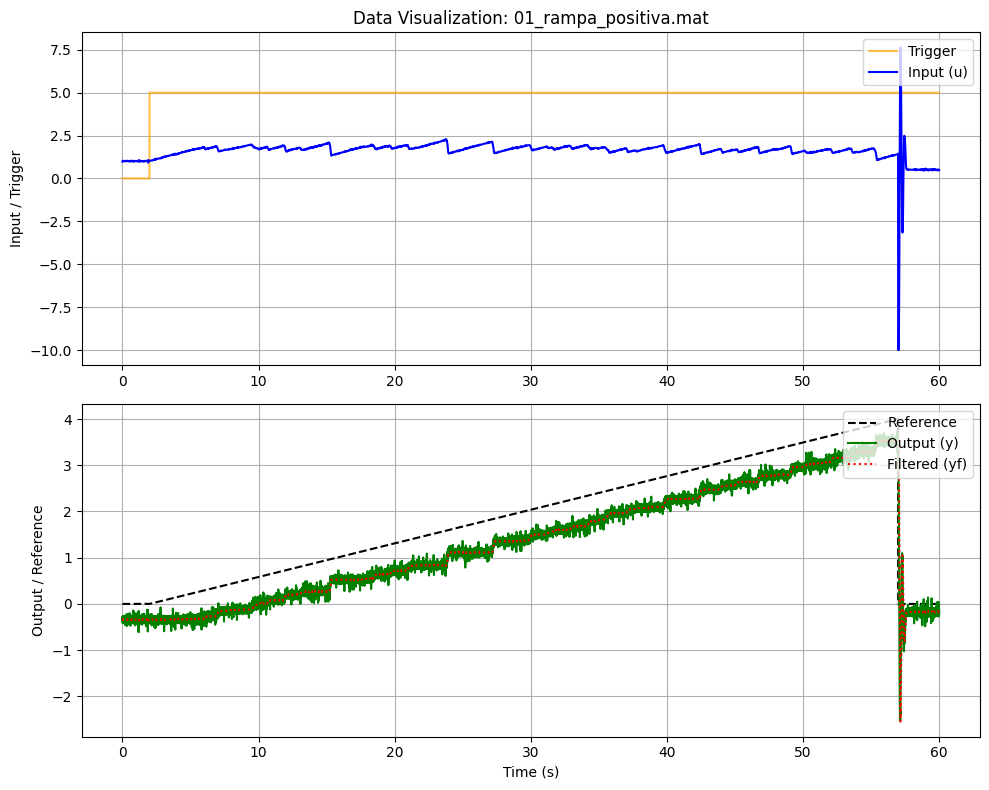

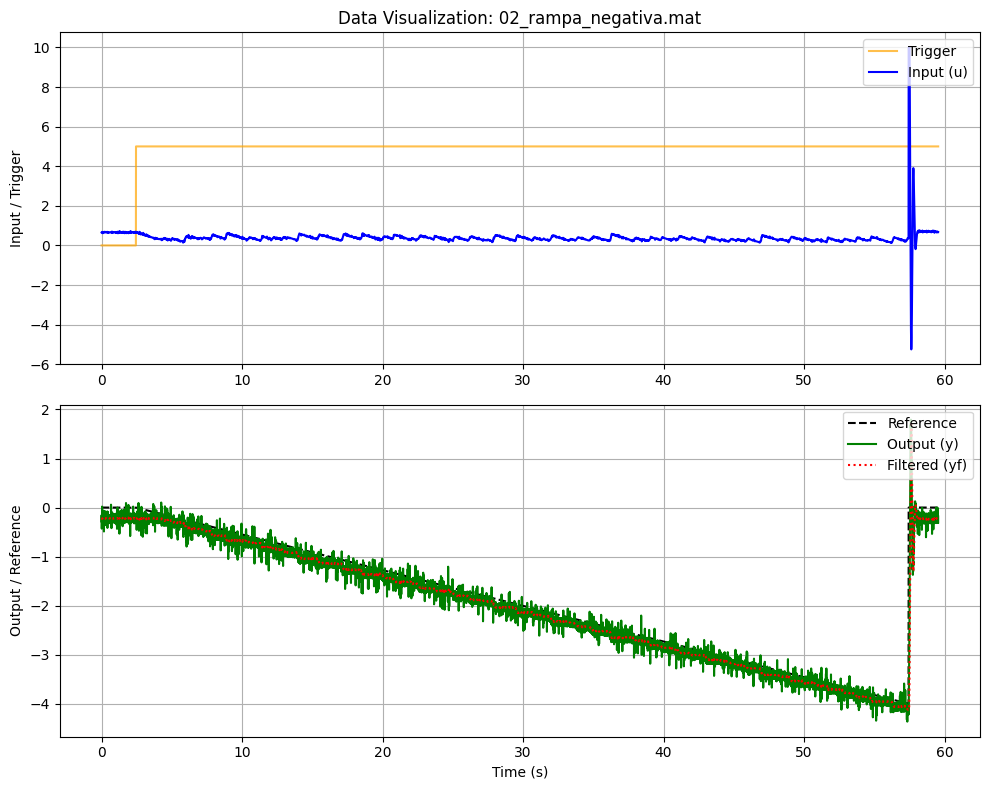

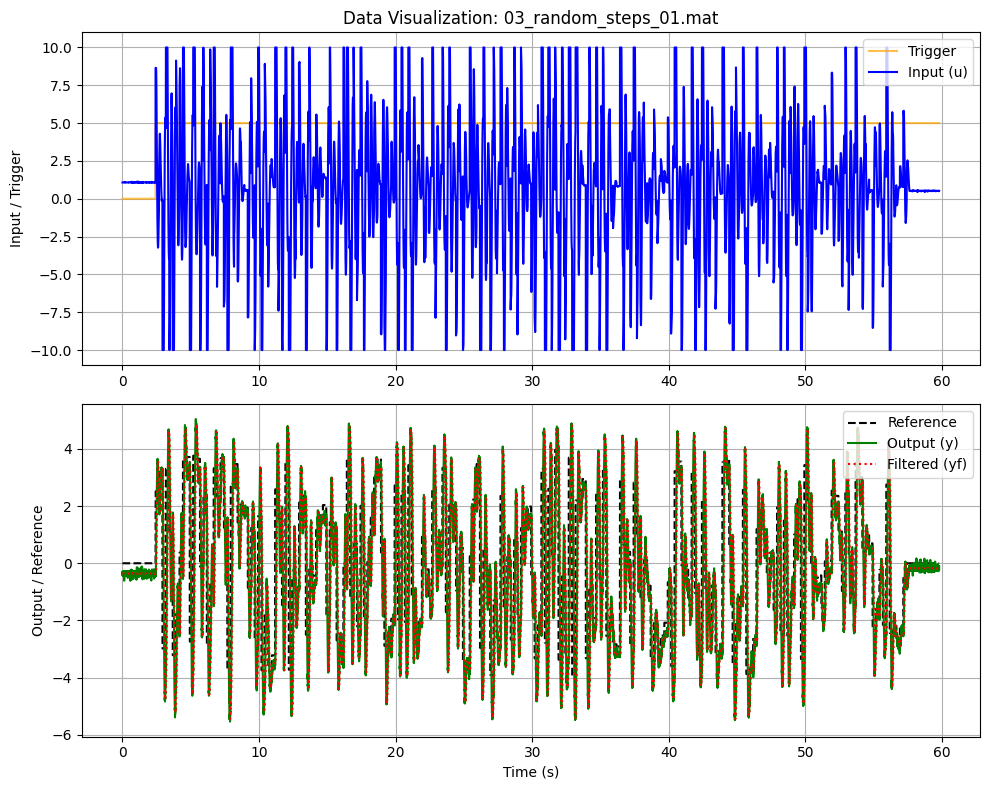

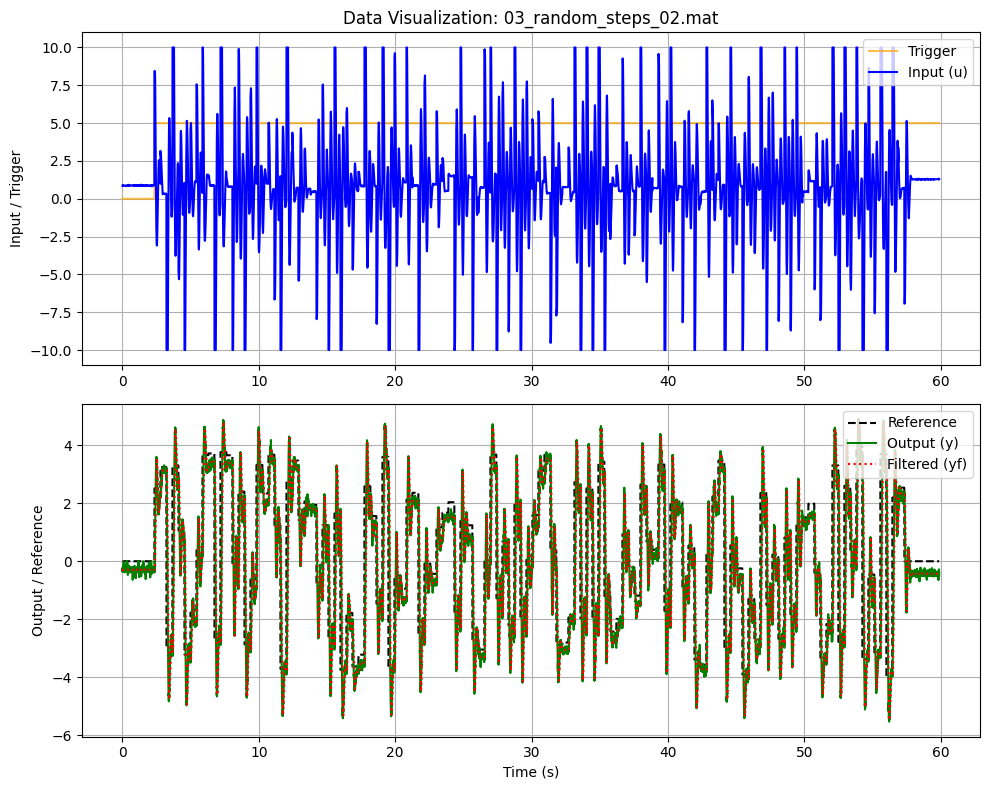

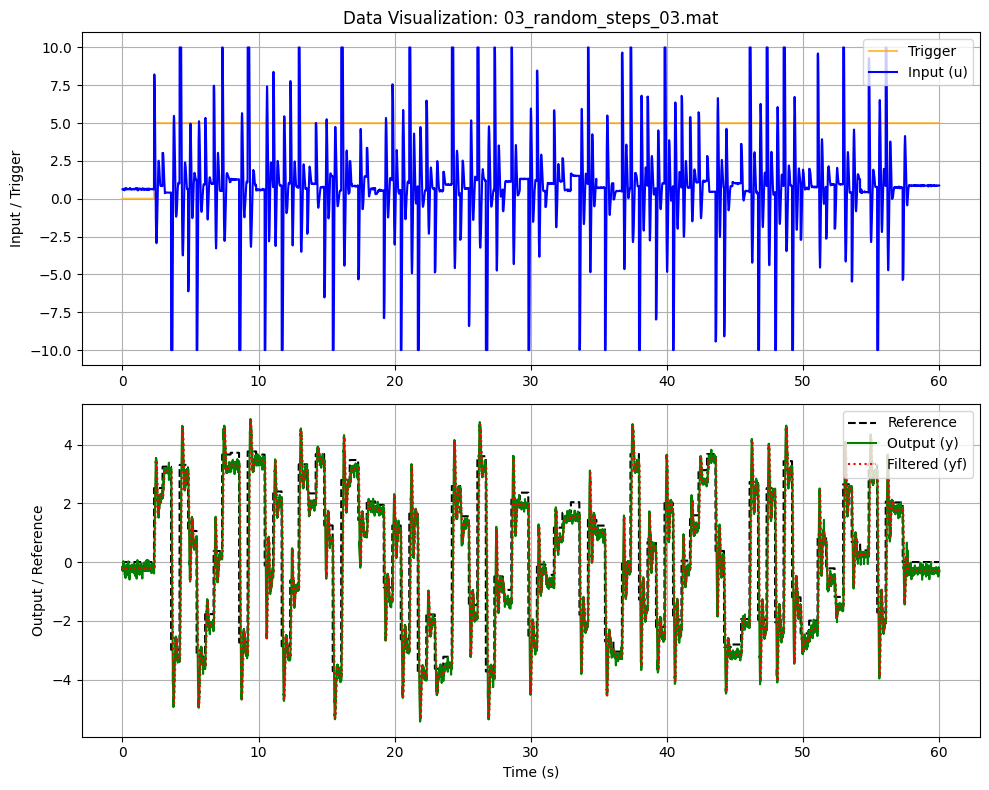

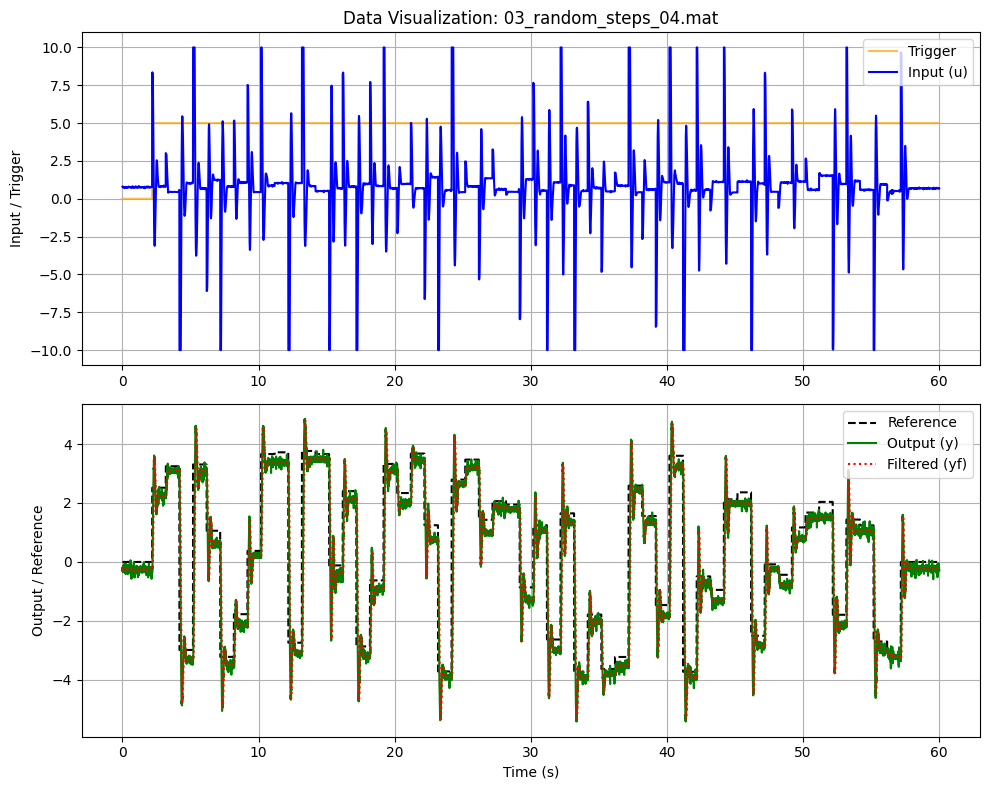

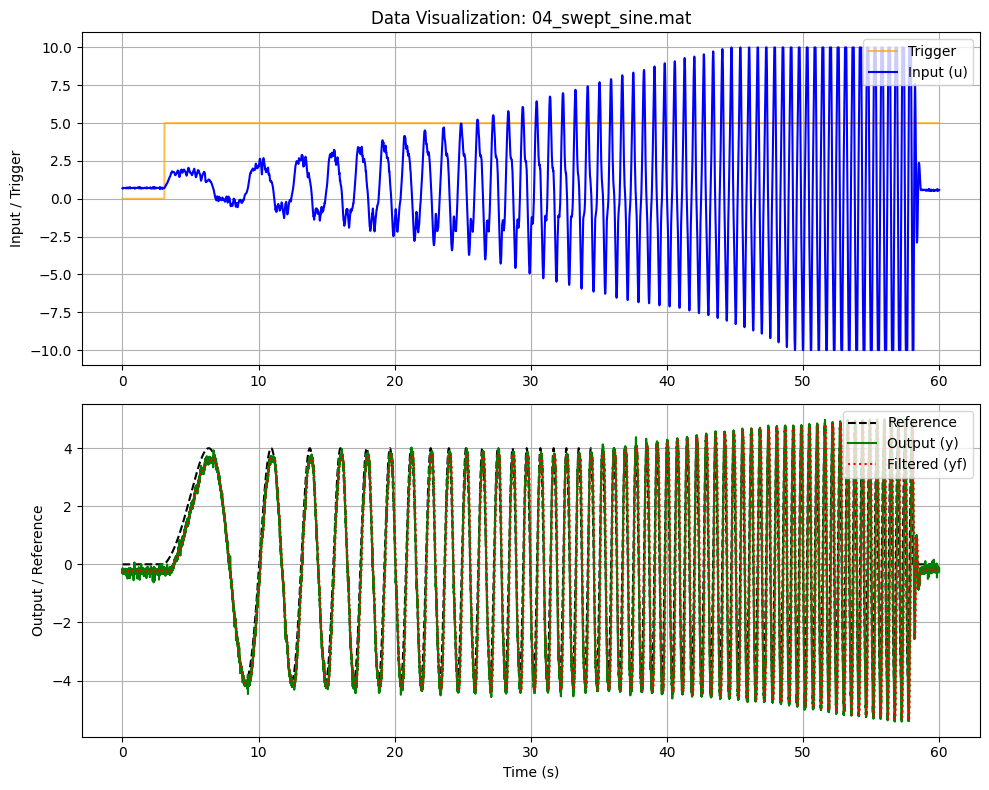

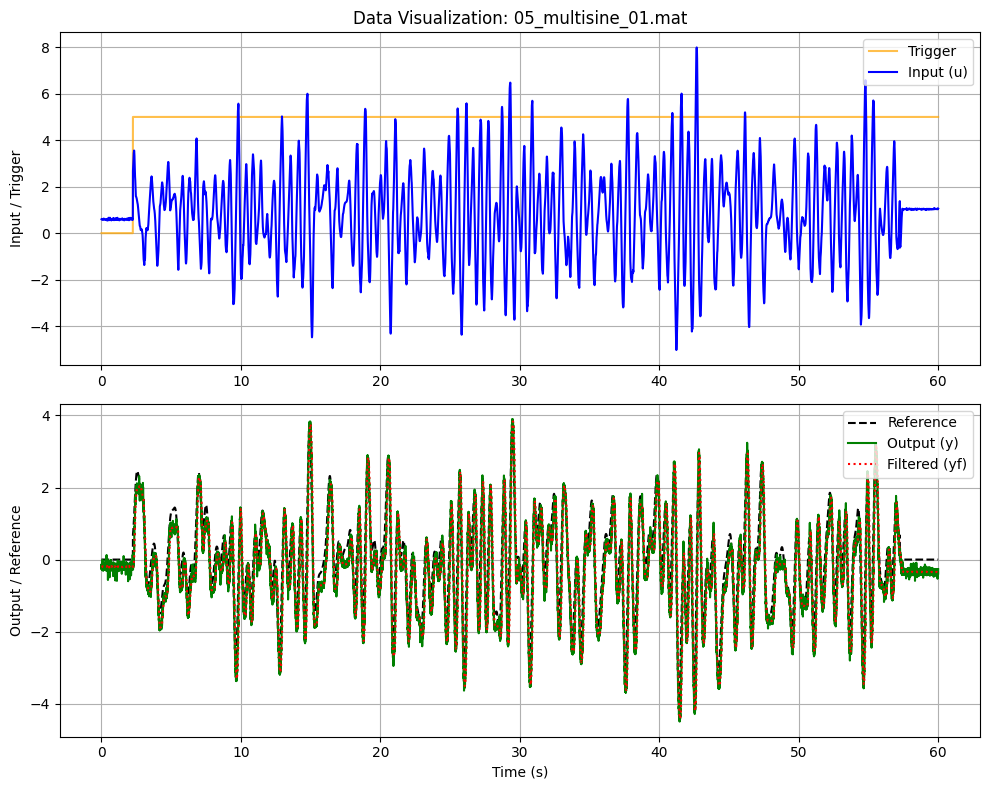

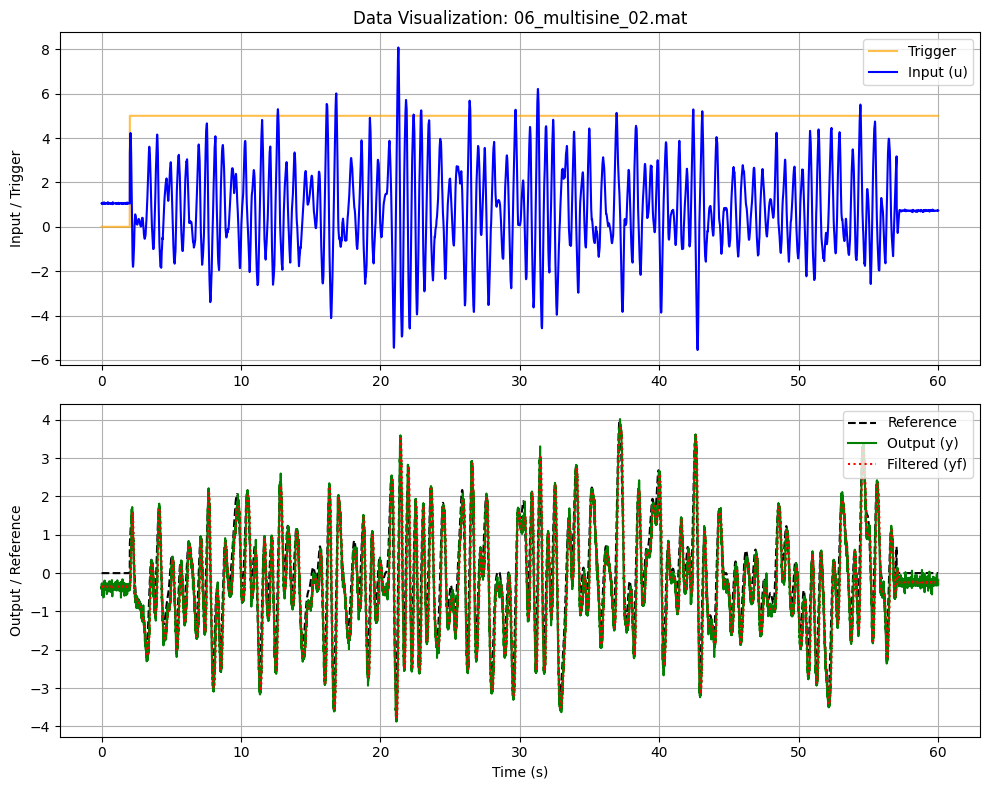

In [4]:

# --------------------------------------------------------------------------
# PLOT ALL ACQUISITIONS
# --------------------------------------------------------------------------
for fname in filenames:
    if fname in data_storage:
        d = data_storage[fname]

        plt.figure(figsize=(10, 8))

        plt.subplot(2, 1, 1)
        plt.plot(d['time'], d['trigger'], label='Trigger', color='orange', alpha=0.7)
        plt.plot(d['time'], d['u'], label='Input (u)', color='blue')
        plt.title(f'Data Visualization: {fname}')
        plt.ylabel('Input / Trigger')
        plt.legend(loc='upper right')
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.plot(d['time'], d['ref'], label='Reference', linestyle='--', color='black')
        plt.plot(d['time'], d['y'], label='Output (y)', color='green')
        plt.plot(d['time'], d['yf'], label='Filtered (yf)', color='red', linestyle=':')
        plt.ylabel('Output / Reference')
        plt.xlabel('Time (s)')
        plt.legend(loc='upper right')
        plt.grid(True)

        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available to plot for {fname}.")